### COVID-19 
### UPDATE by DAY in the countries: 
#### CHINA, GERMANY, ITALY, KOREA, JAPAN, USA, AUSTRALIA, LUXEMBOURG, UK, CANADA, VIETNAM
#### (Start recorded day: 22.01.2020)

In [1]:
from covid import *
%matplotlib inline

Start importing World-data  ./data/COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/
Start importing USA-data  ./data/COVID-19/csse_covid_19_data/csse_covid_19_daily_reports_us/
Start importing single data  ./data/COVID-19/csse_covid_19_data/UID_ISO_FIPS_LookUp_Table.csv
Start importing single data  ./data/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv
Start importing single data  ./data/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv
Start importing single data  ./data/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv


In [2]:
len(countries_no_infopopulation)

35

In [3]:
countries_no_infopopulation

['Curacao',
 'Martinique',
 'Mayotte',
 'Saint Martin',
 'Republic of the Congo',
 'Aruba',
 'Hong Kong',
 'The Bahamas',
 'Guam',
 'Guadeloupe',
 'Faroe Islands',
 'Saint Barthelemy',
 'Taipei and environs',
 'Jersey',
 'Gibraltar',
 'Reunion',
 'Greenland',
 'Guernsey',
 'St. Martin',
 'Puerto Rico',
 'Macau',
 ' Azerbaijan',
 'North Ireland',
 'East Timor',
 'Cayman Islands',
 'Palestine',
 'The Gambia',
 'Republic of Moldova',
 'Vatican City',
 'French Guiana',
 'Ivory Coast',
 'Cape Verde',
 'Channel Islands',
 'occupied Palestinian territory',
 'Others_and_ships']

### Number of covid-19 outbreak days 

In [4]:
rcParams['figure.figsize'] = 20, 10
len(data)

494

In [5]:
updated_date=files[-1].split('.')[0]
updated_date

'05-29-2021'

### COVID situation in the World is being changed by day
### ARE WE BEATING COVID-19?

In [6]:
remaining_by_day = np.array(totalconfirmed_by_day) - np.array(totalrecovered_by_day) - np.array(totalfatalities_by_day)

plt.xticks(np.arange(0, max(x_dat)+1, 10))
plt.plot(x_dat, remaining_by_day, color='orange', label='Remaining')
plt.xlabel('Days')
plt.ylabel('Remaining active cases')
plt.title("ARE WE BEATING COVID-19 IN THE WORLD?")
plt.legend()
plt.savefig('output/AreWeBeatingCovid.jpg')
print("The World still has %0.1f active cases\n"% remaining_by_day[-1])
print("In last 7 days: ", remaining_by_day[-7:])

The World still has 59277272.0 active cases

In last 7 days:  [59777570. 59595454. 59537484. 59537131. 59381388. 59314539. 59277272.]


In [8]:
countries_remaining = countries_confirmed-countries_fatalities-countries_recovered
# Mitigate the negative values by converting all negative values to 0
countries_remaining.mask(countries_remaining<0, 0, inplace=True)

countries_remaining.tail(1)

Zimbabwe  Mozambique  Curacao  Uzbekistan  Saint Lucia  Austria  \
493     761.0       389.0      0.0      3627.0        186.0   5943.0   

       Greece  Estonia   Cyprus  Czechia  ...  Burundi    Libya  \
493  294607.0   5256.0  32942.0  13336.0  ...   3936.0  10420.0   

     Channel Islands  Saudi Arabia  Slovakia  Slovenia    Kenya  \
493              0.0       10013.0  121807.0    4475.0  51211.0   

     occupied Palestinian territory          US  Others_and_ships  
493                             0.0  32657633.0               0.0  

[1 rows x 227 columns]

#### Notes: remaining number in US does not include the recovered data

In [9]:
daily_confirmed_sum = np.array([sum(countries_confirmed.iloc[i]) for i in range(len(countries_confirmed))])
daily_fatal_sum = np.array([sum(countries_fatalities.iloc[i]) for i in range(len(countries_fatalities))])
daily_recovered_sum = np.array([sum(countries_recovered.iloc[i]) for i in range(len(countries_recovered))])

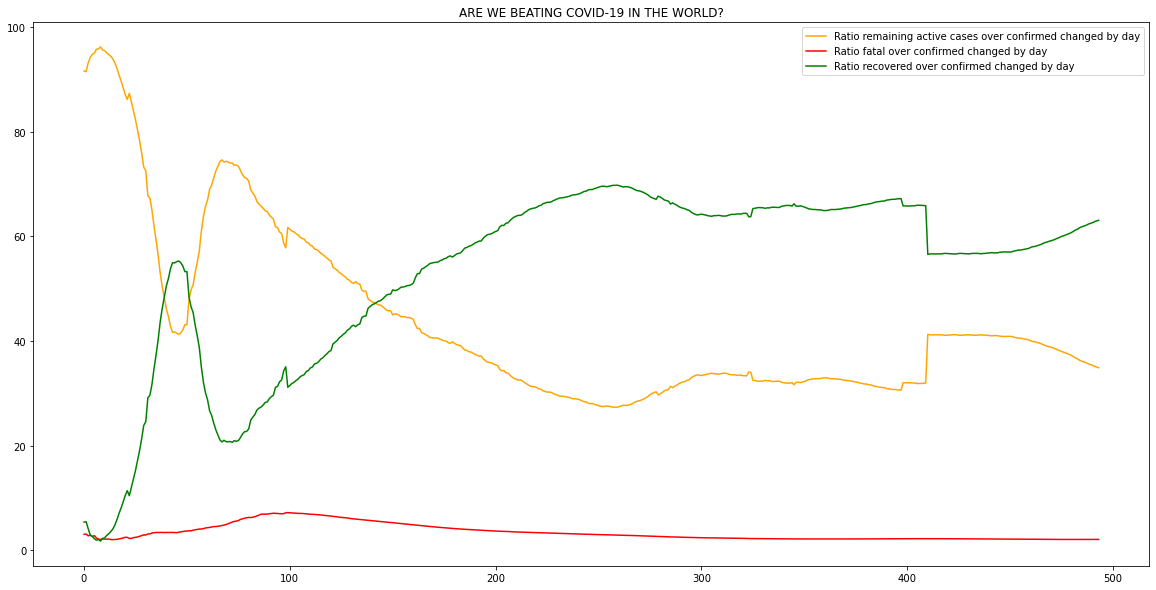

In [10]:
plt.plot(x_dat, ((daily_confirmed_sum-daily_recovered_sum-daily_fatal_sum)/daily_confirmed_sum)*100, color='orange', label='Ratio remaining active cases over confirmed changed by day')
plt.plot(x_dat, (daily_fatal_sum/daily_confirmed_sum)*100, color='red', label='Ratio fatal over confirmed changed by day')
plt.plot(x_dat, (daily_recovered_sum/daily_confirmed_sum)*100, color='green', label='Ratio recovered over confirmed changed by day')
plt.title("ARE WE BEATING COVID-19 IN THE WORLD?")
plt.legend()
plt.savefig('output/AreWeBeatingCovid_ratio.jpg')

### Countries are beating COVID most

493
Greenland            0.0
Micronesia           0.0
Puerto Rico          0.0
St. Martin           0.0
Guernsey             0.0
Reunion              0.0
Gibraltar            0.0
Jersey               0.0
Taipei and environs  0.0
Marshall Islands     0.0
Saint Barthelemy     0.0
Faroe Islands        0.0
Guadeloupe           0.0
Guam                 0.0
The Bahamas          0.0
Hong Kong            0.0
Macau                0.0
Samoa                0.0
Grenada              0.0
Peru                 0.0

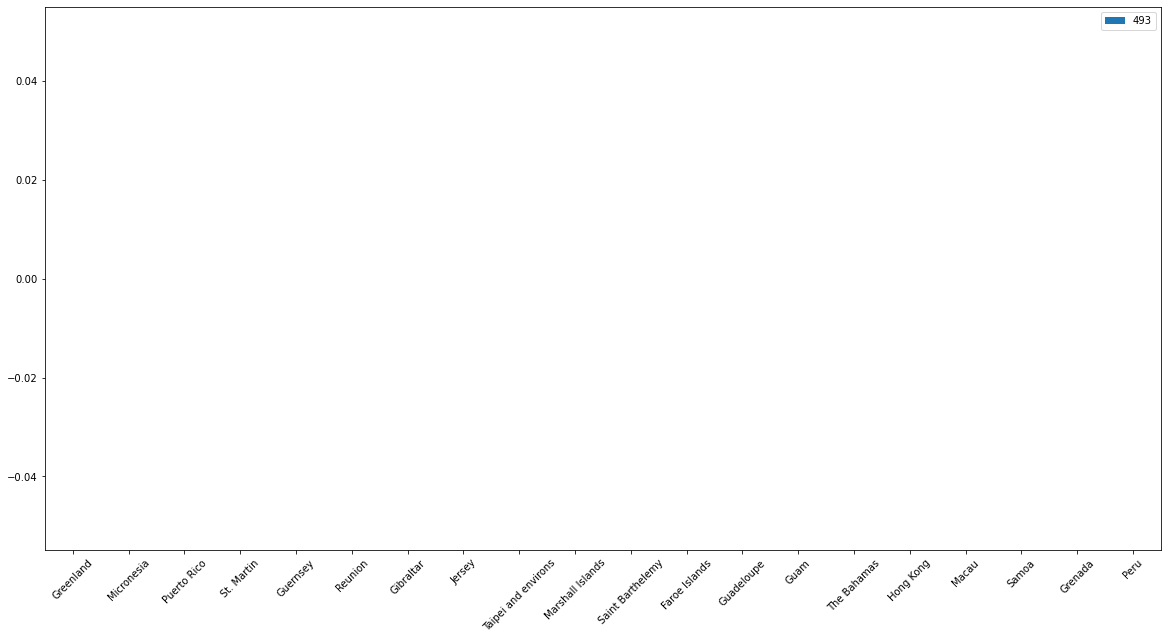

In [11]:
index = countries_remaining.tail(1)
top_remaining = countries_remaining.tail(1).transpose().sort_values(by=index.index[0], ascending=True).head(20)
top_remaining.plot(kind='bar')
plt.xticks(rotation=45)
top_remaining

Greenland  Micronesia  Puerto Rico  St. Martin  Guernsey  Reunion  \
0          0.0         0.0          0.0         0.0       0.0      0.0   
1          0.0         0.0          0.0         0.0       0.0      0.0   
2          0.0         0.0          0.0         0.0       0.0      0.0   
3          0.0         0.0          0.0         0.0       0.0      0.0   
4          0.0         0.0          0.0         0.0       0.0      0.0   
..         ...         ...          ...         ...       ...      ...   
489        0.0         0.0          0.0         0.0       0.0      0.0   
490        0.0         0.0          0.0         0.0       0.0      0.0   
491        0.0         0.0          0.0         0.0       0.0      0.0   
492        0.0         0.0          0.0         0.0       0.0      0.0   
493        0.0         0.0          0.0         0.0       0.0      0.0   

     Gibraltar  Jersey  Taipei and environs  Marshall Islands  \
0          0.0     0.0                  0.0               0.0   
1          0.0     0.0                  0.0               0.0   
2          0.0     0.0                  0.0               0.0   
3          0.0     0.0                  0.0               0.0   
4          0.0     0.0                  0.0               0.0   
..         ...     ...                  ...               ...   
489        0.0     0.0                  0.0               0.0   
490        0.0     0.0                  0.0               0.0   
491        0.0     0.0                  0.0               0.0   
492        0.0     0.0                  0.0               0.0   
493        0.0     0.0                  0.0               0.0   

     Saint Barthelemy  Faroe Islands  Guadeloupe  Guam  The Bahamas  \
0                 0.0            0.0         0.0   0.0          0.0   
1                 0.0            0.0         0.0   0.0          0.0   
2                 0.0            0.0         0.0   0.0          0.0   
3                 0.0            0.0         0.0   0.0          0.0   
4                 0.0            0.0         0.0   0.0          0.0   
..                ...            ...         ...   ...          ...   
489               0.0            0.0         0.0   0.0          0.0   
490               0.0            0.0         0.0   0.0          0.0   
491               0.0            0.0         0.0   0.0          0.0   
492               0.0            0.0         0.0   0.0          0.0   
493               0.0            0.0         0.0   0.0          0.0   

     Hong Kong  Macau  Samoa  Grenada  Peru  
0          0.0    1.0    0.0      0.0   0.0  
1          2.0    2.0    0.0      0.0   0.0  
2          2.0    2.0    0.0      0.0   0.0  
3          5.0    2.0    0.0      0.0   0.0  
4          8.0    5.0    0.0      0.0   0.0  
..         ...    ...    ...      ...   ...  
489        0.0    0.0    0.0      0.0   0.0  
490        0.0    0.0    0.0      0.0   0.0  
491        0.0    0.0    0.0      0.0   0.0  
492        0.0    0.0    0.0      0.0   0.0  
493        0.0    0.0    0.0      0.0   0.0  

[494 rows x 20 columns]

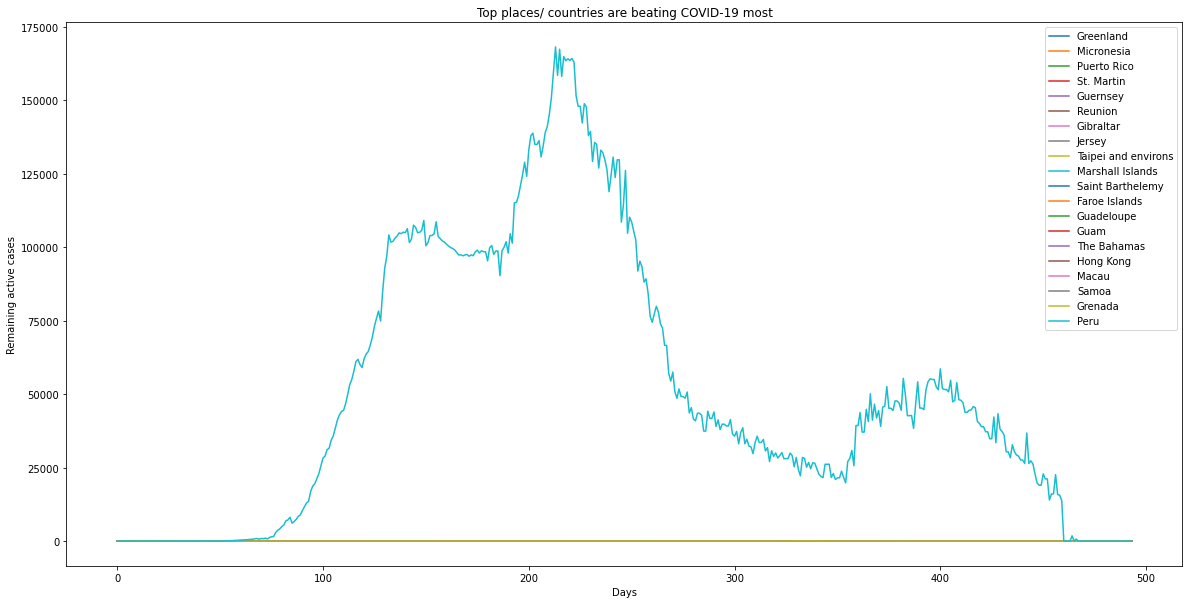

In [12]:
countries_remaining[top_remaining.index].plot()
plt.xlabel('Days')
plt.ylabel('Remaining active cases')
plt.title("Top places/ countries are beating COVID-19 most")
countries_remaining[top_remaining.index]

### Countries are beating COVID least

In [13]:
bottom_remaining = countries_remaining.tail(1).transpose().sort_values(by=index.index[0], ascending=False).head(20)
bottom_remaining.plot(kind='bar')
plt.title("Total remaining active cases")
plt.xticks(rotation=45)
bottom_remaining

493
US              32657633.0
France           5219481.0
United Kingdom   4353305.0
Spain            3438377.0
India            2114508.0
Netherlands      1627268.0
Brazil           1514319.0
Sweden           1054022.0
Belgium          1034842.0
Serbia            705202.0
Iran              388444.0
Argentina         366688.0
Switzerland       364618.0
Greece            294607.0
Mexico            263183.0
Russia            260410.0
Italy             241966.0
Ireland           226565.0
Poland            161014.0
Honduras          146267.0

Text(0.5, 1.0, 'Top places/ countries are beating COVID-19 least')

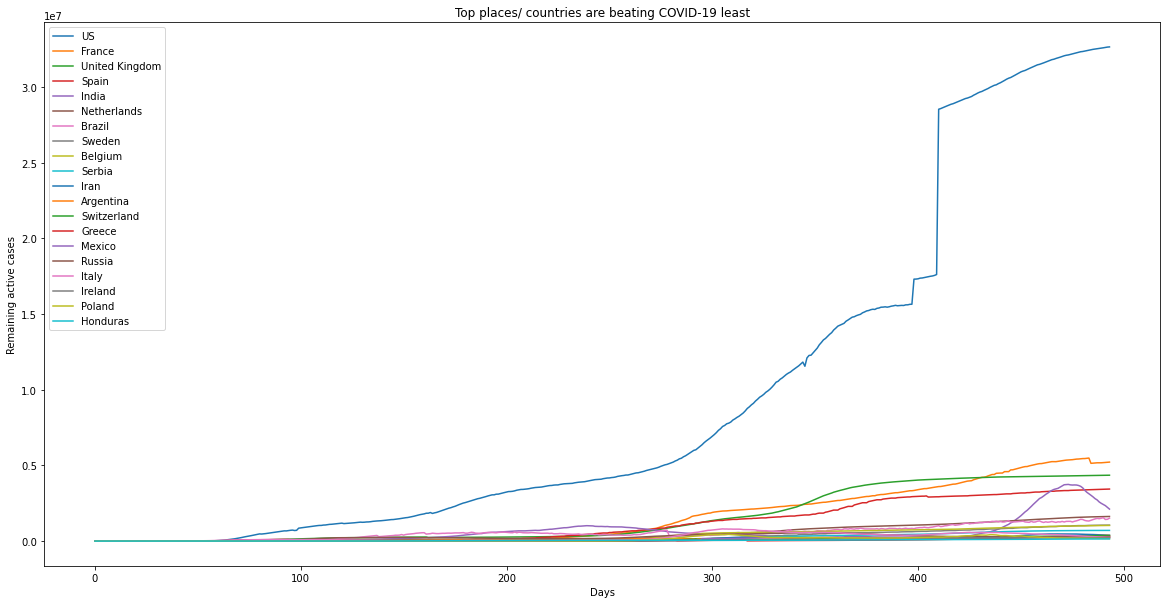

In [14]:
countries_remaining[bottom_remaining.index].plot()
plt.xlabel('Days')
plt.ylabel('Remaining active cases')
plt.title("Top places/ countries are beating COVID-19 least")

#### The current remaining days is not included with the recovered data from US. 
#### See: https://github.com/CSSEGISandData/COVID-19/issues/3464